<a href="https://colab.research.google.com/github/BaishaliChetia/CapsNet-Keras/blob/master/VGGmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications import VGG16;
#from keras.applications.vgg16 import preprocess_input

In [2]:
#width , height = 150, 150


# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
#PADDING train images
train_X =[]

for i in range(train_images.shape[0]):
  train_pad = np.pad(train_images[i], pad_width=10 , mode= 'edge')
  #print(train_pad)
  train_X.append(train_pad)
  


In [4]:
#PADDING test images
test_X = []
for i in range(test_images.shape[0]):
  test_pad = np.pad(test_images[i], pad_width=10 , mode= 'edge')
  #print(train_pad)
  test_X.append(test_pad)

In [5]:
train_X = np.array(train_X)
test_X = np.array(test_X)
train_X.shape, test_X.shape

((60000, 48, 48), (10000, 48, 48))

In [6]:
# mnist2 = tf.keras.datasets.fashion_mnist
# (train_images2, train_labels2), (test_images2, test_labels2) = mnist2.load_data()

In [7]:
classes = np.unique(train_labels)
num_classes = len(classes)
num_classes

10

In [8]:
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape

((60000, 48, 144), (10000, 48, 144))

In [9]:
train_X = train_X.reshape(-1, 48,48,3)
test_X= test_X.reshape (-1,48,48,3)
train_X.shape,test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [10]:
# # Resize the images 48*48 as required by VGG16
# from keras.preprocessing.image import img_to_array, array_to_img
# train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
# test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
# #train_x = preprocess_input(x)
# train_X.shape, test_X.shape

In [11]:

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [12]:
# Converting Labels to one hot encoded format
from tensorflow.keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_labels)
test_Y_one_hot = to_categorical(test_labels)

In [13]:
# Splitting train data as train and validation data
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.1,
                                                           random_state=13
                                                           )

In [14]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((54000, 48, 48, 3), (6000, 48, 48, 3), (54000, 10), (6000, 10))

In [15]:
# Define the parameters for instanitaing VGG16 model. 
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [16]:
#from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
import os

In [17]:
# Preprocessing the input 
train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (test_X)

In [18]:
vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top= False, input_shape= (IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))
vggModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [19]:
# Extracting features
train_features = vggModel.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = vggModel.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = vggModel.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

375/375 [==============================] - 2s 5ms/step


In [20]:
train_features.shape


(54000, 1, 1, 512)

In [21]:
val_features.shape

(6000, 1, 1, 512)

In [22]:
train_features.reshape(train_features.shape[0], -1)
train_features.shape

(54000, 1, 1, 512)

In [23]:
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(54000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (6000, 1, 1, 512)


In [24]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (54000,512))
test_features_flat = np.reshape(test_features, (10000,512))
val_features_flat = np.reshape(val_features, (6000, 512))

In [25]:
train_features.shape

(54000, 1, 1, 512)

In [26]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU

In [49]:
# 7.0 Define the densely connected classifier followed by leakyrelu layer and finally dense layer for the number of classes
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
#model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(num_classes, activation='softmax'))


In [43]:

# model = keras.Sequential([
#                           vggModel,
#                           keras.layers.Flatten(),
#                           keras.layers.Dense(512, activation='relu', input_dim=(1*1*512)), 
#                           keras.layers.Dense(num_classes, activation= 'softmax')

                          
# ])


In [50]:
# Compile the model.
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

In [29]:
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [47]:
valid_X.shape

(6000, 48, 48, 3)

In [51]:
# Train the the model
history = model.fit(
    train_features_flat,
    train_label,
    epochs=50,
    validation_data=(val_features_flat, valid_label),
   
)

Epoch 1/50
1688/1688 [==============================] - 18s 3ms/step - loss: 2.1708 - acc: 0.2358 - val_loss: 1.8099 - val_acc: 0.3633
Epoch 2/50
1688/1688 [==============================] - 6s 3ms/step - loss: 1.6455 - acc: 0.4045 - val_loss: 1.6035 - val_acc: 0.4060
Epoch 3/50
1688/1688 [==============================] - 6s 3ms/step - loss: 1.4859 - acc: 0.4714 - val_loss: 1.4478 - val_acc: 0.4845
Epoch 4/50
1688/1688 [==============================] - 6s 3ms/step - loss: 1.3782 - acc: 0.5155 - val_loss: 1.3718 - val_acc: 0.5185
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 1.2836 - acc: 0.5623 - val_loss: 1.2426 - val_acc: 0.5738
Epoch 6/50
1688/1688 [==============================] - 6s 3ms/step - loss: 1.2223 - acc: 0.5855 - val_loss: 1.3606 - val_acc: 0.5265
Epoch 7/50
1688/1688 [==============================] - 5s 3ms/step - loss: 1.1811 - acc: 0.6012 - val_loss: 1.1295 - val_acc: 0.6153
Epoch 8/50
1688/1688 [==============================] - 6s 3m

In [52]:
print(f'Best Validation Accuracy = {np.max(history.history["val_acc"])}')
print(f'Best Training   Accuracy = {np.max(history.history["acc"])}')

Best Validation Accuracy = 0.7708333134651184
Best Training   Accuracy = 0.7519444227218628


In [32]:
vgg_basemodel_file = model.save("/content/drive/MyDrive/MnistResults/vgg_save_basemodel1.tf", save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MnistResults/vgg_save_basemodel1.tf/assets


In [38]:
model1 = keras.models.load_model("/content/drive/MyDrive/MnistResults/vgg_save_basemodel1.tf")
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


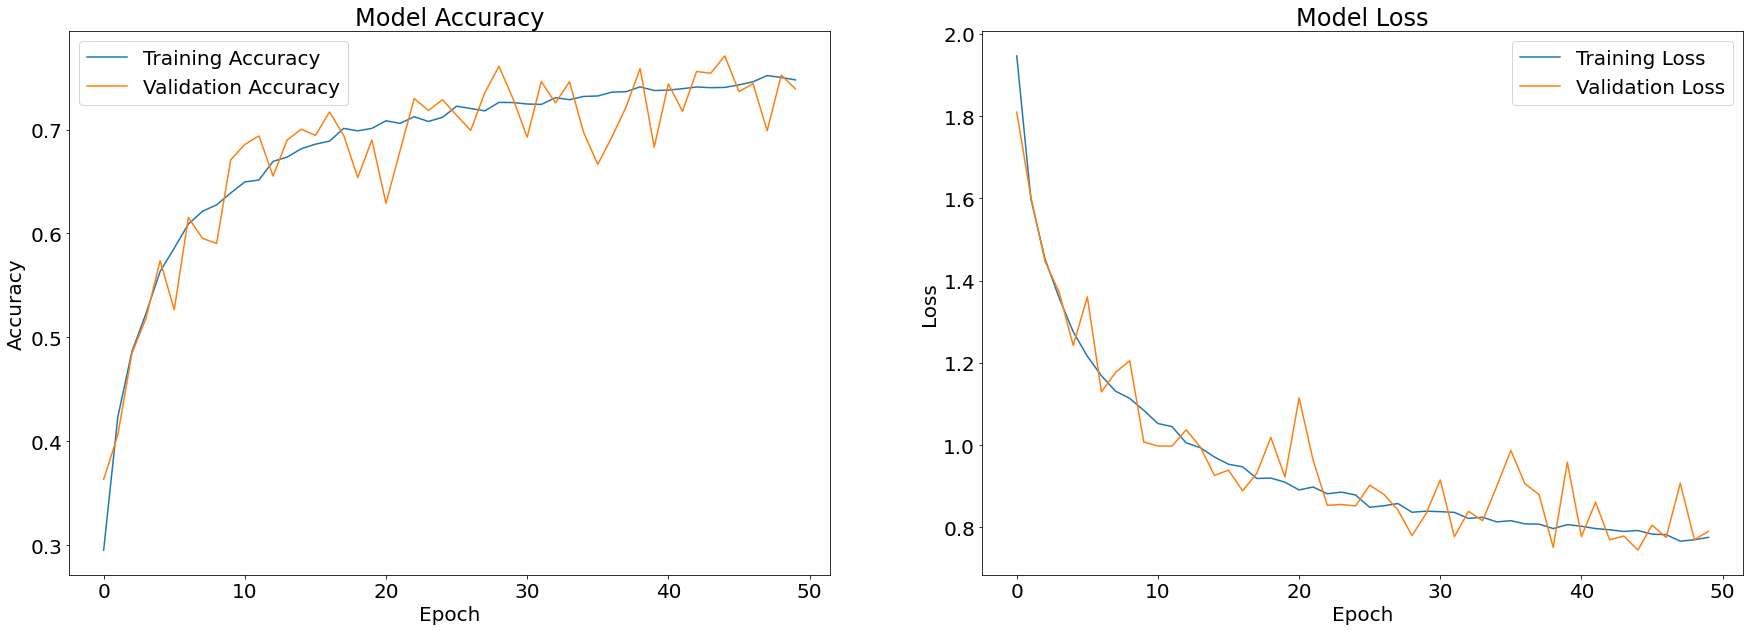

In [53]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30, 10)
plt.rcParams["font.size"] = 20

fig, ax = plt.subplots(1, 2)

ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

In [34]:
pip install -q tensorflow-model-optimization

In [35]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = train_X.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs
finalSparsity = 0.55
list_accuracy = []
while finalSparsity <= 0.95:
  #model1.load_weights('/content/drive/MyDrive/MnistResults/cnn_best_weights4.hdf5')
  pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                                final_sparsity=finalSparsity,
                                                                begin_step=0,
                                                                end_step=end_step)
  }
  
  # Define model for pruning.
  model_for_pruning = prune_low_magnitude(model, **pruning_params)

  # `prune_low_magnitude` requires a recompile.
  model_for_pruning.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  #model_for_pruning.summary()
  logdir = tempfile.mkdtemp()

  callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
  ]

  model_for_pruning.fit(train_images, train_labels,
                    batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                    callbacks=callbacks)
  _, model_for_pruning_accuracy = model_for_pruning.evaluate(
   test_images, test_labels, verbose=0)
  print(f'Pruned test accuracy at final_sparsity: at {finalSparsity} is {model_for_pruning_accuracy}')
  list_accuracy.append(model_for_pruning_accuracy)
  finalSparsity += 0.05

ValueError: ignored